<h1>Implementing disparity constraints with a view to runtime improvements</h1>
<h2> Experiment notebook: <a href="ALG_002_EXP_001-Baseline-MacLean_et_al.ipynb">ALG_002_EXP_001-Baseline-MacLean_et_al</a></h2>
<h2 id="Introduction">Introduction</h2>
<p>Informed by the baseline <a href="ALG_001-EXP_001-Baseline-VIS.ipynb" target="_blank" rel="noopener">performances and runtimes</a>, it was decided to research means of improving on the algorithm&rsquo;s runtimes. This was planned to be done from two directions: The first one was to introduce additional constraints into the pipeline, while the second one was optimising the implementation of the algorithm. This notebook demonstrates the findings and decisions made in the first regard based on the work of Maclean et al (2010).</p>
<h2 id="Abstract">Abstract</h2>
<p>Two constraints were introduced to the pipeline proposed by the authors mentioned above (MacLean, Sabihuddin and Islam, 2010). Additionally, matrix initialisation technique proposed by them was implemented and tested as well. &nbsp;These changes, while preserving the accuracy of the algorithm (actually there was a slight positive change observed) resulted in a 5-fold reduction in runtimes. Newly developed visual analytical tools were used to facilitate analysis.</p>
<h2 id="Relevant-theory">Relevant theory - Constraints and their justification</h2>
<p>There were two constraints proposed by said authors that were decided to be implemented. The first one was to introduce a maximum disparity constraints. This entailed that when iterating through the right scanline&rsquo;s each pixel for each left pixel and calculating matching cost, only a certain range was examined. For instance, if we take an image of width 10, and the maximum disparity level was 5, only 5 pixels were considered for each left pixel instead of 10. More formally</p>
<pre>i - j &lt; D<sub>max</sub>,</pre>
<p>where &ldquo;i&rdquo; is the index of the left scanline and &ldquo;j&rdquo; is the index of the right scanline and D<sub>max</sub> is the allowed max disparity.</p>
<p>The second constraint was introduced assuming the algorithms application on rectified images, namely, &nbsp;only those set of pixels were considered that for the following holds:</p>
<pre>i &ndash; j &gt;= 0,</pre>
<p>entailing that cells above the main diagonal were not considered. For any given pixel &ldquo;i&rdquo; in the left scanline, its position is not allowed to be more rightwards in the right scanline.</p>
<p>This needed a different matrix initialisation technique, as cells in the &ldquo;score&rdquo; and &ldquo;moves&rdquo; matrices above the main diagonal would remain empty, they could not influence matching cost computation. Therefore they proposed the following:</p>
<p>Each row and column is initialised in an iterative manner. In each iteration both a row and a column is initialised with the pixel index&rsquo;s value multiplied by the gap&rsquo;s value. The starting index for the initialisation is the iteration index in each iteration. The best way to demonstrate this is perhaps to copy the function implemented to perform this task:</p>
<p>&nbsp;</p>
<pre>def maclean_init(self, matrix):<br />&nbsp;&nbsp;&nbsp; for i in range(0, matrix.shape[0]):<br />&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; matrix[i:, i] = np.array([(i) * self.gap for i in range(i, matrix.shape[0])]).T<br />&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; matrix[i, i:] = np.array([(i) * self.gap for i in range(i, matrix.shape[1])])</pre>
<p>&nbsp;</p>
<p>Note, that in python notation &ldquo;i:&rdquo; means from &ldquo;i till n&rdquo;, where n is the width of the image. &ldquo;.T&rdquo; means a transposed matrix.</p>
<h2 id="Method">Methodology</h2>
<p>The methodology &nbsp;for the first part of this experiment was the same as discussed in the first, <a href="ALG_001-EXP_001-Baseline-VIS.ipynb" target="_blank" rel="noopener">baseline experiment</a>. In the second part, results from the first experiment were compared to the new results.</p>
<ul>
<li>Additionally, visual, though, not comparative analyses methods were developed and tested, namely:
<ul>
<li>Comparison of the histograms of the estimated disparities and the ground truth values</li>
<li>The visualisation of correct and erroneous pixels characterised as &ldquo;hit&rdquo; and &ldquo;miss&rdquo;.</li>
<li>The difference between the estimated disparities and ground truth values were plotted in 3D.</li>
<li>The estimated disparity was visualised in 3D by projecting the original image&rsquo;s colour values back to the surface where pixel errors were less than the selected threshold value. Other pixels were given black colour.</li>
</ul>
</li>
</ul>
<h2 id="Results-and-discussion">Results and discussion</h2>
<p>Runtimes have been improved by a factor of 5. However, it still entails a 3-minute-runtime for each matching which was a huge improvement but was still regarded as insufficient. Maclean at al.&rsquo;s proposed implementation (which included custom hardware as well) could deliver 120 frames per second at 0.5 pixel resolution. Although, this performance was not intended to be matches, 180 seconds was still regarded as impractical. The accuracy of the algorithm was approximately the same as the baseline algorithms, therefore it was deemed as justified to use to proposed constraints and matrix initialisation technique for future experiments.</p>
<p>The histograms showed (apart from other not yet identifiable discrepancies) that the algorithm had a significant amount of false positives when it comes to occluded areas (0 intensity). The 3D projection of the differences in pixel values between the output and the ground truth suggested a that errors also occurred in high numbers around object boundaries (and discontinuities). The results of &ldquo;hit and miss&rdquo; and &ldquo;3D image projection onto the estimated disparity&rdquo; were thought to highlight the &ldquo;streaking&rdquo; nature of errors (Hirschmuller, 2008) more accurately than just the observation of the raw disparity outputs. In order to for the visual analytical tools to be more useful, these artefacts (streaking artefacts and discontinuities) have to be reduced significantly so that others can be identified.</p>
<h2 id="Conclusion">Conclusion</h2>
<p>The new initialisation method and constraints proposed by Maclean et al. proved to be efficient in reducing the runtimes of the algorithm while maintaining its <a href="ALG_001-EXP_001-Baseline-VIS.ipynb" target="_blank" rel="noopener">previously benchmarked accuracy.</a> However, further improvements were thought to be important to be implemented when it comes to runtimes.</p>
<p>Aided by the newly developed visual analytical tools (new in the context of this project), it was established that the errors were of two different natures:</p>
<ul>
<li>Streaking artefacts</li>
<li>Errors near discontinuities</li>
</ul>
<h2 id="References">References</h2>
<ol>
<li>Hirschmuller, H. (2008) &lsquo;Stereo Processing by Semiglobal Matching and Mutual Information&rsquo;, <em>IEEE Transactions on Pattern Analysis and Machine Intelligence</em>, 30(2), pp. 328&ndash;341. doi: 10.1109/TPAMI.2007.1166.</li>
<li>MacLean, W. J., Sabihuddin, S. and Islam, J. (2010) &lsquo;Leveraging cost matrix structure for hardware implementation of stereo disparity computation using dynamic programming&rsquo;, in <em>Computer Vision and Image Understanding</em>, pp. 1126&ndash;1138. doi: 10.1016/j.cviu.2010.03.011.</li>
</ol>

### Loading used modules

In [1]:
###################################################################
# Built-in modules ################################################
###################################################################
import sys
import os
sys.path.append(os.path.join("..", ".."))

import numpy as np
import imp
import cv2
import matplotlib.pyplot as plt
import gc
from components.utils.CSVWriter2 import Wrapper as l
from components.utils.Metrix import Wrapper as me
import math
import time
import glob
import pandas as pd
import ipywidgets as widgets

###################################################################
# Custom modules ##################################################
###################################################################

from components.matchers.OriginalMatcher3 import Wrapper as m
from components.utils.SimpleProgressBar import SimpleProgressBar
from components.utils import utils as u
from components.utils import plot_utils as plu
from components.utils.CSVWriter2 import Wrapper as csv
from components.utils import visualisation_utils as vu

###################################################################
# Dataset specific modules#########################################
###################################################################

from components.utils import middlebury_utils as mbu
import project_helpers



In [2]:
dropdown_interactivity = widgets.Dropdown(
                                            options = [("static", "inline"), ("interactive", "notebook")],
    description = "Interactivity:"
)
print("Please, if you experience rendering problems, switch to static rendering.")
dropdown_interactivity

Please, if you experience rendering problems, switch to static rendering.


Dropdown(description='Interactivity:', options=(('static', 'inline'), ('interactive', 'notebook')), value='inl…

In [3]:
interactivity = dropdown_interactivity.value
interactivity

'inline'

### Experiment and dataset paths

In [4]:
ROOT_PATH = os.path.join("..", "..")
EXPERIMENT_TITLE = "ALG_002_EXP_001-Baseline-MacLean_et_al"
DATASET = "middlebury"

DATASET_FOLDER = os.path.join(ROOT_PATH, "datasets", DATASET)
LOG_FOLDER = os.path.join(ROOT_PATH, "experiments", "logs")


SCENES = ["teddy", "cones"]
SIZE=""
YEAR= 2003


CSV_FILE_2 = "ALG_001-EXP_001-Baseline.csv"

CSV_FILEPATH = os.path.join(LOG_FOLDER, EXPERIMENT_TITLE+".csv")
CSV_FILEPATH_2 = os.path.join(LOG_FOLDER, CSV_FILE_2)

###  Loading the dataset and its visualisation

..\..\datasets\middlebury\middlebury_2003\teddy
..\..\datasets\middlebury\middlebury_2003\teddy\im2.png
..\..\datasets\middlebury\middlebury_2003\teddy\im6.png
..\..\datasets\middlebury\middlebury_2003\teddy\disp2.png
..\..\datasets\middlebury\middlebury_2003\teddy\nonocc.png
..\..\datasets\middlebury\middlebury_2003\cones
..\..\datasets\middlebury\middlebury_2003\cones\im2.png
..\..\datasets\middlebury\middlebury_2003\cones\im6.png
..\..\datasets\middlebury\middlebury_2003\cones\disp2.png
..\..\datasets\middlebury\middlebury_2003\cones\nonocc.png


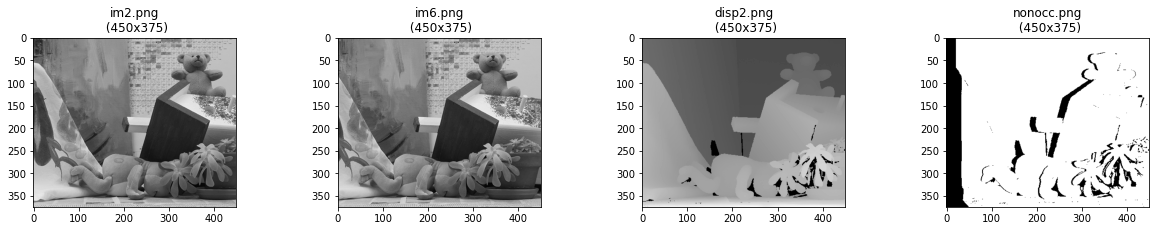

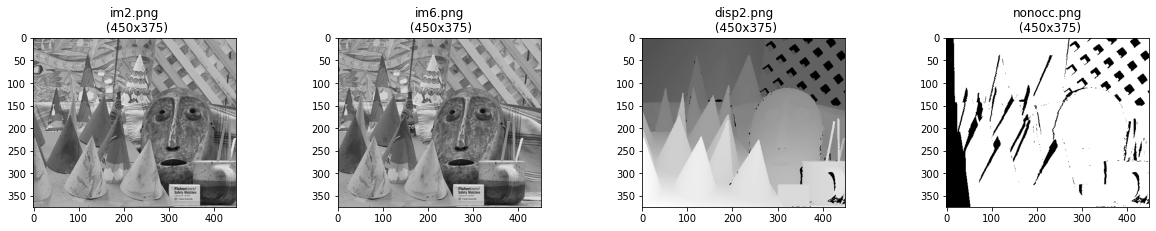

In [5]:
%matplotlib $interactivity
loaded_imgs_and_paths = list(mbu.get_images(DATASET_FOLDER, YEAR, scene) for scene in SCENES)
nonocc_gts = list()
i =1
for im, path in loaded_imgs_and_paths:
    filenames = list(os.path.split(p)[-1] for p in path)
    plu.plot_images(im, filenames)
    temp = mbu.add_masks_to_raw_disparity(im[2], im[3])
    nonocc_gts.append(temp)


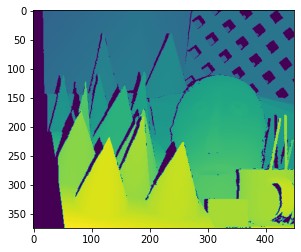

In [6]:
plt.imshow(nonocc_gts[1])

### Loading the logs
Do we have a matching number of log entries?

In [7]:
experiment_log = pd.read_csv(CSV_FILEPATH)
experiment_log.sort_values(by="bad4", inplace=True) 
experiment_log.drop_duplicates(inplace=True)


experiment_log_2 = pd.read_csv(CSV_FILEPATH_2)
experiment_log_2.drop_duplicates(inplace=True)
experiment_log_2 = experiment_log_2[experiment_log_2["init_method"]=="gap*col_index"]

experiment_log_2.shape == experiment_log.shape

True

### Merging the log files

In [8]:
joined_log = experiment_log.merge(experiment_log_2, on=["match", "gap", "egap", "scene", "are_occlusions_errors"])
joined_log.columns

Index(['experiment_id_x', 'match', 'gap', 'egap', 'algo_x', 'init_method_x',
       'dataset_x', 'scene', 'image_filename_x', 'img_res_x',
       'preprocessing_method_x', 'kernel_size_x', 'kernel_spec_x',
       'are_occlusions_errors', 'abs_error_x', 'mse_x', 'avg_x', 'eucledian_x',
       'bad1_x', 'bad2_x', 'bad4_x', 'bad8_x', 'runtime_x', 'experiment_id_y',
       'algo_y', 'init_method_y', 'dataset_y', 'image_filename_y', 'img_res_y',
       'preprocessing_method_y', 'kernel_size_y', 'kernel_spec_y',
       'abs_error_y', 'mse_y', 'avg_y', 'eucledian_y', 'bad1_y', 'bad2_y',
       'bad4_y', 'bad8_y', 'runtime_y'],
      dtype='object')

### Comparing the two log files' results
The "Maclean_et_al" version fares better in both regards.

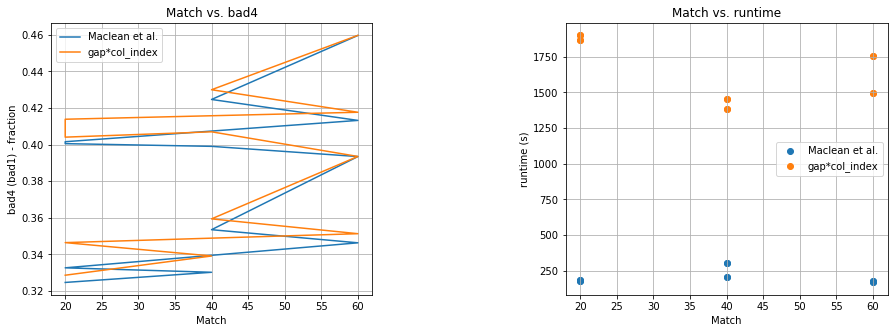

In [9]:
%matplotlib $interactivity
x1 = joined_log["match"].values
y1 = joined_log["bad4_x"].values
x2 = joined_log["match"].values
y2 = joined_log["bad4_y"].values

fig = plt.figure(figsize=[15, 5])
fig.subplots_adjust(wspace=0.6)

ax = fig.add_subplot(1,2,1)
ax.plot(x1, y1, label="Maclean et al.")
ax.plot(x2,y2, label="gap*col_index")
ax.set_xlabel("Match")
ax.set_ylabel("bad4 (bad1) - fraction")
ax.legend()
ax.set_title("Match vs. bad4")
ax.grid()


y1 = joined_log["runtime_x"].values
y2 = joined_log["runtime_y"].values

ax = fig.add_subplot(1,2,2)
ax.scatter(x1, y1, label="Maclean et al.")
ax.scatter(x2,y2, label="gap*col_index")
ax.set_xlabel("Match")
ax.set_ylabel("runtime (s)")
ax.legend()
ax.set_title("Match vs. runtime")
ax.grid()


### Loading image data to dataframes for visual analysis

In [10]:
read_function = lambda p: plt.imread(project_helpers.fix_win_rel_paths(p))

joined_log["loaded_imgs_x"] = [read_function(img_path) for img_path in joined_log["image_filename_x"]]

joined_log["loaded_imgs_y"] = [read_function(img_path) for img_path in joined_log["image_filename_y"]]

joined_log["loaded_imgs_x_titles"] =  joined_log["scene"].values+"_"+\
                                      joined_log["init_method_x"].values+"_"+\
                                      joined_log["match"].astype(str).values
        
joined_log["loaded_imgs_y_titles"] =  joined_log["scene"].values+"_"+\
                                      joined_log["init_method_y"].values+"_"+\
                                      joined_log["match"].astype(str).values


## Visualisations

In [11]:
dropdown = widgets.Dropdown(
    options=[("ALG_002_EXP_001", "x"), ("ALG_001_EXP_001", "y")],
    description='Experiment:',
    disabled=False,
)
dropdown

Dropdown(description='Experiment:', options=(('ALG_002_EXP_001', 'x'), ('ALG_001_EXP_001', 'y')), value='x')

In [12]:
selected_experiment_suffix = dropdown.value

results = joined_log["loaded_imgs_"+selected_experiment_suffix].values

titles = joined_log["loaded_imgs_"+selected_experiment_suffix+"_titles"]


### Disparity estimates

(<Figure size 1440x1728 with 12 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1aff702c610>)

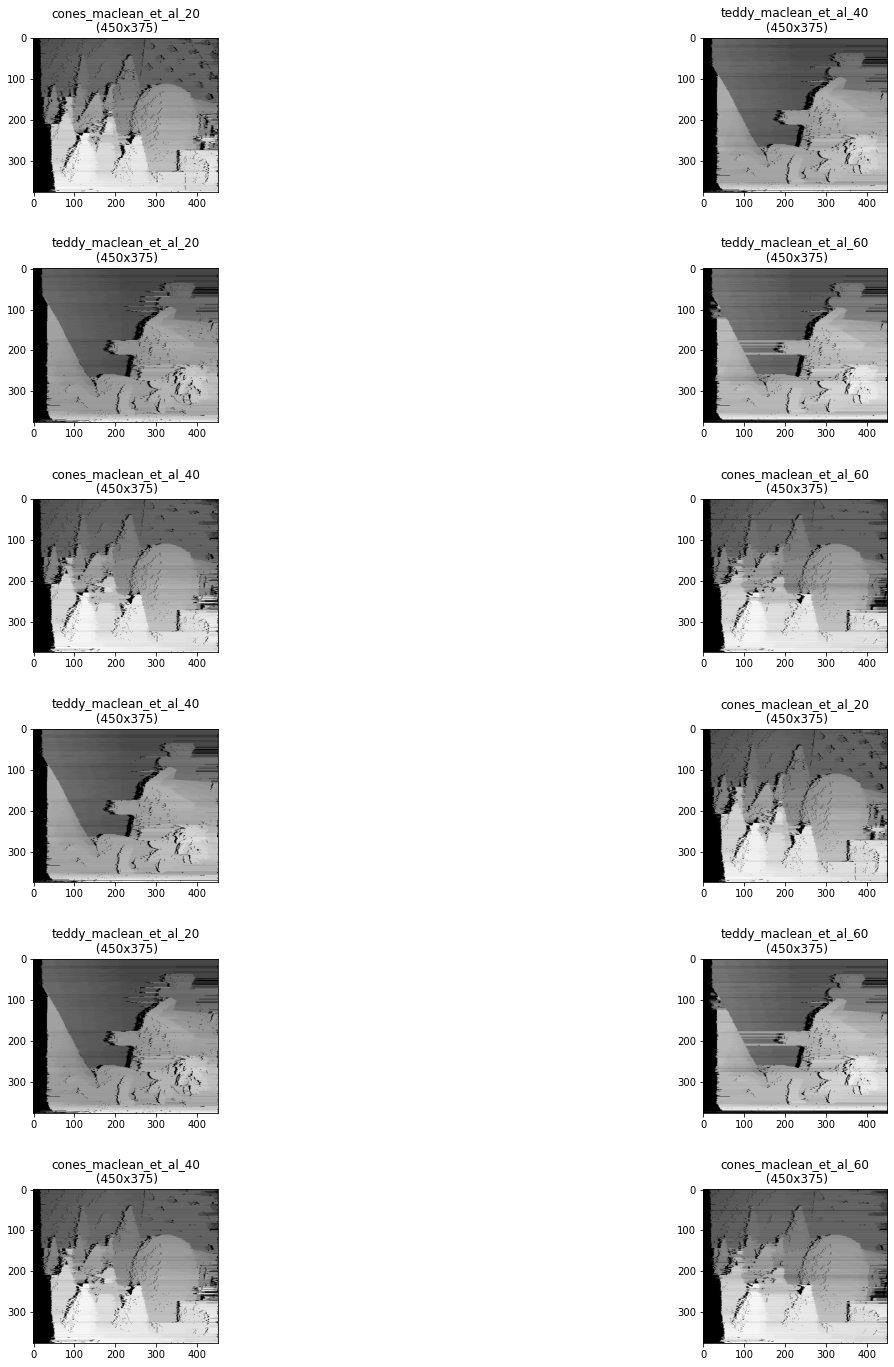

In [13]:
%matplotlib $interactivity
plu.plot_images(results, titles, ncols=2)

### Comparing output disparities with the ground truth: histograms
Note: Disparity estimates are compared to masked ground truths.

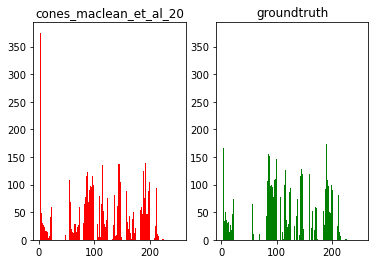

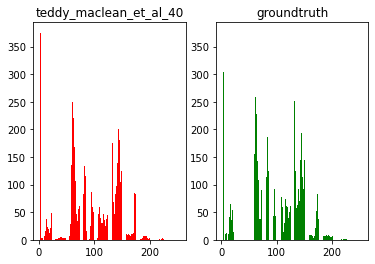

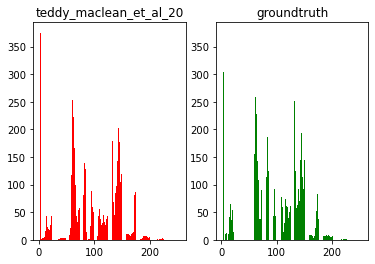

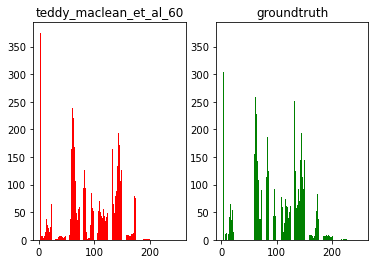

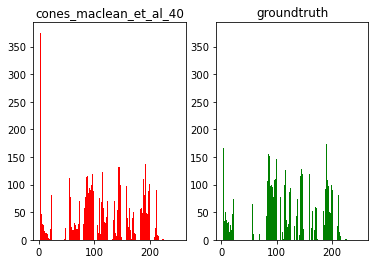

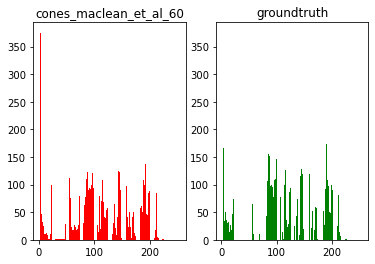

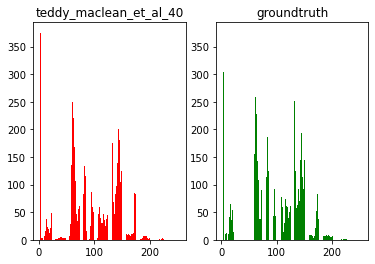

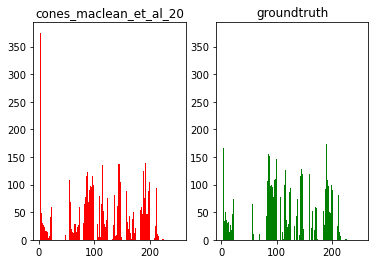

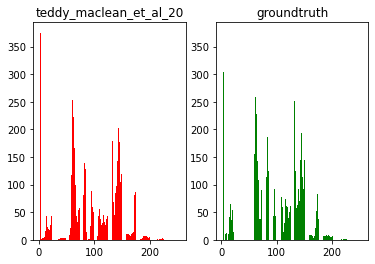

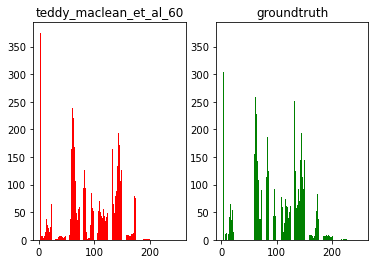

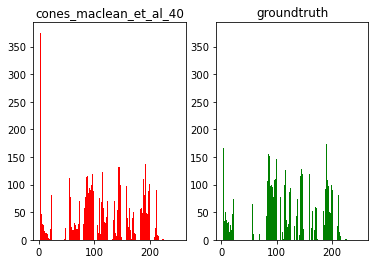

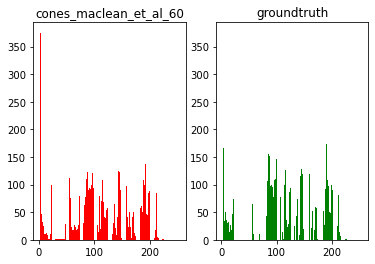

In [14]:
%matplotlib $interactivity

counter = 0
for img, title in zip(results, titles):
    nonocc_index = 0 if "teddy" in title else 1
    vu.compare_histograms(img*255, nonocc_gts[nonocc_index], titles = [title, "groundtruth"])
    counter+=1

### Comparing output disparities with the ground truth: "hit and miss"

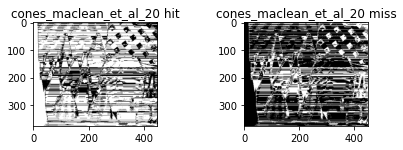

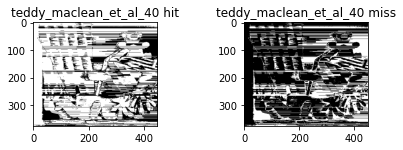

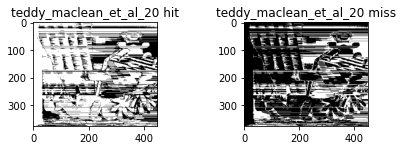

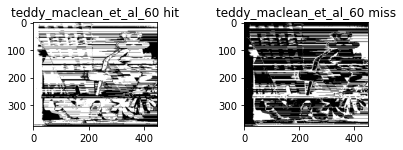

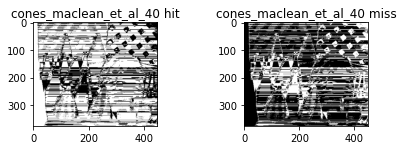

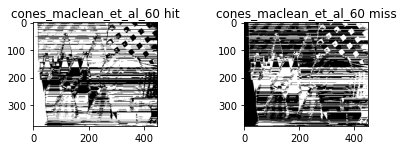

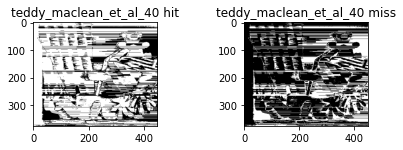

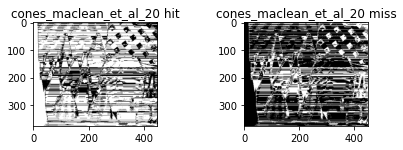

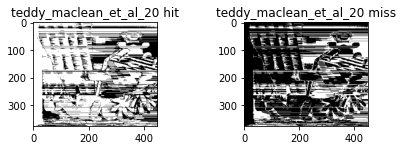

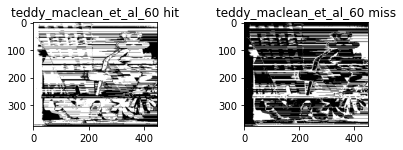

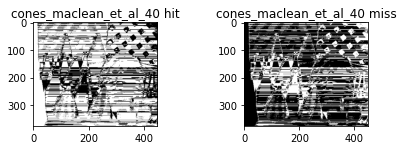

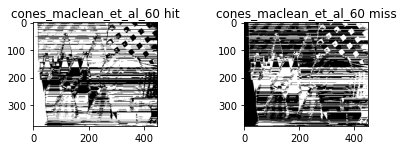

In [15]:
%matplotlib $interactivity
for img, title in zip(results, titles):
    #print(int((i)%2))
    nonocc_index = 0 if "teddy" in title else 1
    vu.show_hit_and_miss(img*255, nonocc_gts[nonocc_index], threshold=4, titles=[title+" hit", title+" miss"])

### Comparing output disparities with the ground truth: differences shown in 3D

In [16]:
dropdown_image_selector = widgets.Dropdown(
    options = [(title, i) for i, title in enumerate(titles)],
    description = "Image"
)
dropdown_image_selector

Dropdown(description='Image', options=(('cones_maclean_et_al_20', 0), ('teddy_maclean_et_al_40', 1), ('teddy_m…

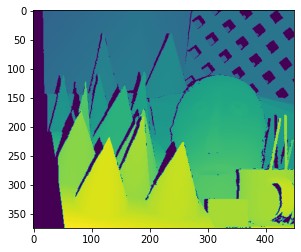

In [17]:
plt.imshow(nonocc_gts[nonocc_index])

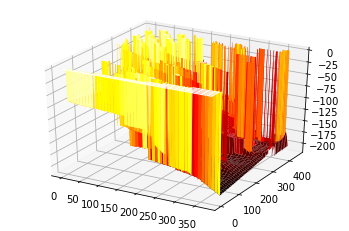

In [18]:
%matplotlib $interactivity
image_index = dropdown_image_selector.value
nonocc_index = 0 if "teddy" in titles[image_index] else 1
vu.show_difference(results[image_index], nonocc_gts[nonocc_index], cmm="hot")

### Loading dataset in color mode

In [19]:
loaded_imgs_and_paths_colored = list(mbu.get_images(DATASET_FOLDER, YEAR, scene, grayscale=False) for scene in SCENES)

..\..\datasets\middlebury\middlebury_2003\teddy
..\..\datasets\middlebury\middlebury_2003\teddy\im2.png
..\..\datasets\middlebury\middlebury_2003\teddy\im6.png
..\..\datasets\middlebury\middlebury_2003\teddy\disp2.png
..\..\datasets\middlebury\middlebury_2003\teddy\nonocc.png
..\..\datasets\middlebury\middlebury_2003\cones
..\..\datasets\middlebury\middlebury_2003\cones\im2.png
..\..\datasets\middlebury\middlebury_2003\cones\im6.png
..\..\datasets\middlebury\middlebury_2003\cones\disp2.png
..\..\datasets\middlebury\middlebury_2003\cones\nonocc.png


### Displaying the ground truth disparity with the left image as its surface
The "finess" parameter is responsible for the smoothness of rendering. The less, the more accurate it is. Matplotlib is sensitive to this parameter when it comes to interactive charts and 3D rendering, therefore the recommended minimum level is 5.

In [20]:
dropdown_scene = widgets.Dropdown(
    options=[("teddy", 0), ("cones", 1)],
    description='Scene:',
    disabled=False,
)
options = [i for i in range(1, 30)]
slider = widgets.SelectionSlider(
    options=options,
    value=5,
    description='Quality:',
    disabled=False
)

widgets.VBox([dropdown_scene, slider])

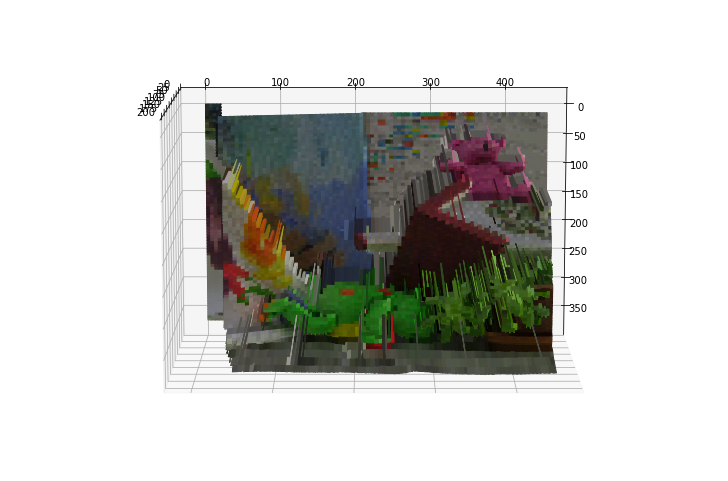

In [21]:
%matplotlib $interactivity
vu.plod3d_with_img_surface(nonocc_gts[dropdown_scene.value], finess=slider.value, surface=loaded_imgs_and_paths_colored[dropdown_scene.value][0][0])

### Displaying a disparity and the back-projection of the image to its surface in 3D
Note: errors (bad4) are shown in black <br>
    

In [22]:
options = [i for i in range(1, 30)]
slider_quality = widgets.SelectionSlider(
    options=options,
    value=5,
    description='Quality:',
    disabled=False
)
options2 = [i for i in range(1, 10)]
slider_bad = widgets.SelectionSlider(
    options=options,
    value=4,
    description='Bad:',
    disabled=False
)
dropdown_image_selector_2 = widgets.Dropdown(
    options = [(title, i) for i, title in enumerate(titles)],
    description = "Image"
)
dropdown_image_selector
widgets.VBox([dropdown_image_selector_2,slider_bad,  slider_quality])

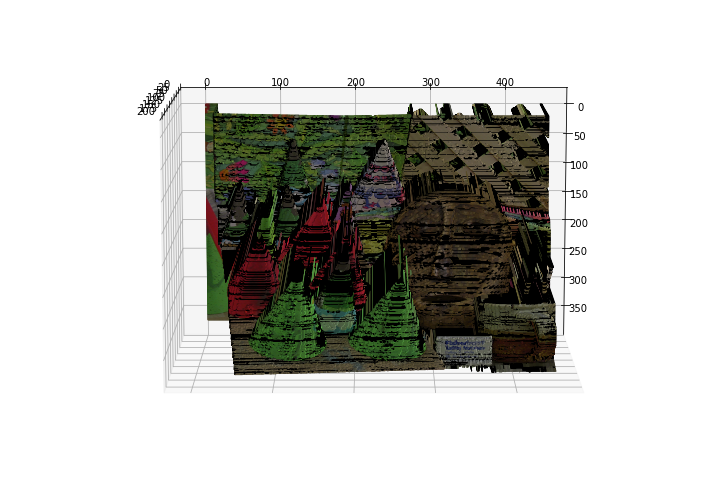

In [25]:
### Array indices:
%matplotlib inline
image_index = dropdown_image_selector_2.value
nonocc_index = 0 if "teddy" in titles[image_index] else 1

selected_disparity = results[image_index]
hit_mask = np.abs(results[image_index]*255-nonocc_gts[nonocc_index])>slider_bad.value

img_to_modify = loaded_imgs_and_paths_colored[nonocc_index][0][0].copy()
img_to_modify[hit_mask, :]=0
vu.plod3d_with_img_surface(nonocc_gts[nonocc_index], finess=slider_quality.value, surface=img_to_modify)


In [24]:
nonocc_gts[nonocc_index].max()

216